Time Series Forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
# Step 1: Load the dataset
data = pd.read_csv('yahoo_stock.csv', parse_dates=['Date'], index_col='Date')

In [7]:
# Step 2: Inspect the dataset and ensure the 'Close' column is available
print(data.columns)  # Check the columns
print(data.head())   # Check the first few rows

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')
                   High          Low         Open        Close        Volume  \
Date                                                                           
2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088  3.587980e+09   
2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893  3.884930e+09   
2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107  1.466840e+09   

              Adj Close  
Date                     
2015-11-23  2086.590088  
2015-11-24  2089.139893  
2015-11-25  2088.870117  
2015-11-26  2088.870117  
2015-11-27  2090.110107  


In [8]:
# Step 3: Select the 'Close' price for forecasting
# Ensure you're selecting the correct column for forecasting
train = data['Close']

In [9]:
# Step 4: Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # p=5, d=1, q=0 for ARIMA
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1825
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8589.834
Date:                Thu, 02 Jan 2025   AIC                          17191.668
Time:                        16:27:18   BIC                          17224.721
Sample:                    11-23-2015   HQIC                         17203.861
                         - 11-20-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1670      0.009    -17.636      0.000      -0.186      -0.148
ar.L2          0.0746      0.011      6.926      0.000       0.053       0.096
ar.L3          0.0537      0.011      4.977      0.0

In [10]:
# Step 5: Forecast the future stock prices
forecast_steps = 30  # Forecast the next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

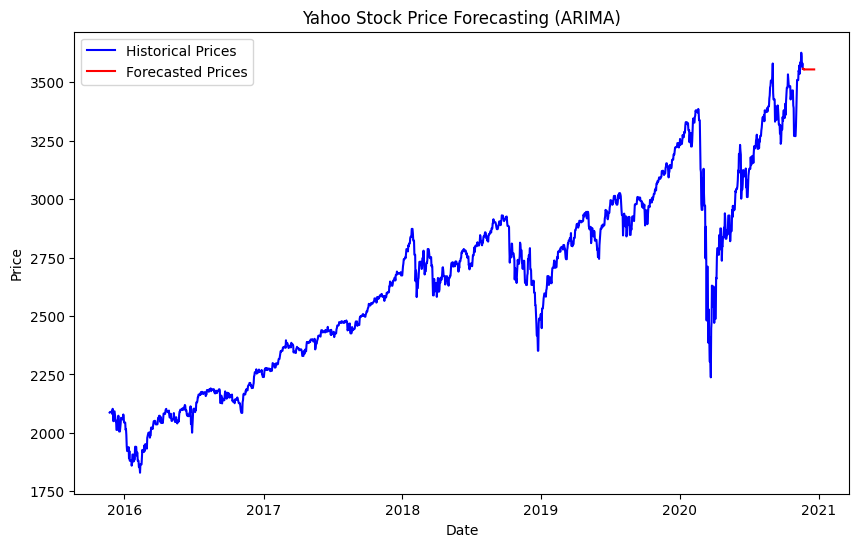

In [11]:
# Step 6: Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Historical Prices', color='blue')
plt.plot(pd.date_range(train.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Forecasted Prices', color='red')
plt.title('Yahoo Stock Price Forecasting (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()